In [1]:
import pandas as pd 
import numpy as np
import re 
import string 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv(r"D:\datasets2\spam.csv",encoding="latin")

In [3]:
df=df.iloc[:,:2]

In [4]:
df.columns=["label","message"]

In [5]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.shape


(5572, 2)

In [8]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [9]:
df.duplicated().sum()


403

In [10]:
df=df.drop_duplicates()


In [11]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Exploratory Data Anlaysis

<AxesSubplot: >

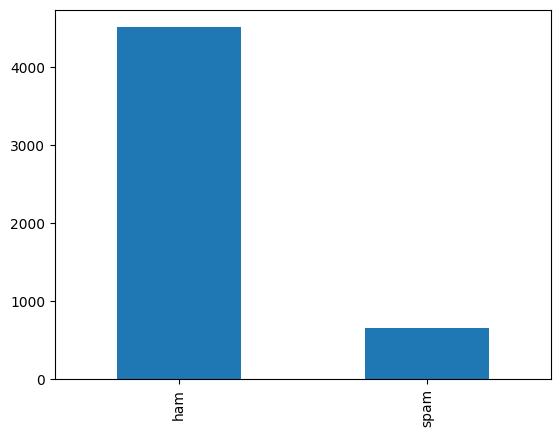

In [12]:
df.label.value_counts().plot(kind="bar")

([<matplotlib.patches.Wedge at 0x219ca4bd710>,
 [Text(-1.106726972879899, 0.46384847472002694, 'Ham'),
  Text(1.1067270163085225, -0.4638483711007676, 'Spam')],
 [Text(-0.6455907341799411, 0.2705782769200157, '87.37'),
  Text(0.6455907595133047, -0.2705782164754477, '12.63')])

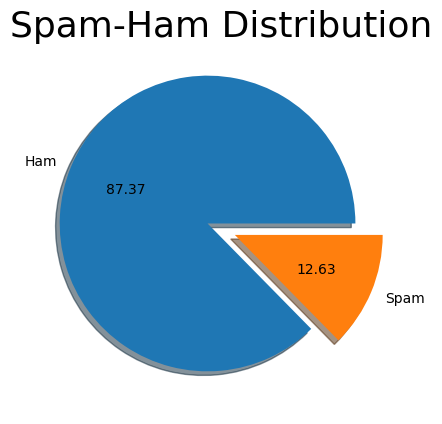

In [13]:
plt.title("Spam-Ham Distribution",fontsize=26)
plt.pie(df.label.value_counts(),labels=["Ham","Spam"],autopct="%0.2f",explode=[0.1]*2,shadow=True)

# We observed here that our dataset is quite imbalanced since ham-messages consists of our 87.37% of our dataset where as the spam-messages are having only 12.63% share .


In [14]:
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\NEERA
[nltk_data]     KUMARI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
df.message[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [16]:
df["num_characters"]=df.message.apply(lambda x:len(x))

C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_18380\3152468651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"]=df.message.apply(lambda x:len(x))


In [17]:
df

,label,message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [18]:
from nltk.tokenize import word_tokenize

In [19]:
df["num_words"]=df.message.apply(lambda x:len(nltk.word_tokenize(x)))


C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_18380\1906398376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"]=df.message.apply(lambda x:len(nltk.word_tokenize(x)))


In [20]:
df["num_sentences"]=df.message.apply(lambda x:len(nltk.sent_tokenize(x)))


C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_18380\2244371029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sentences"]=df.message.apply(lambda x:len(nltk.sent_tokenize(x)))


In [21]:
df

,label,message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [22]:
df[df.label=="ham"].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
df[df.label=="spam"].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot: xlabel='num_characters', ylabel='Count'>

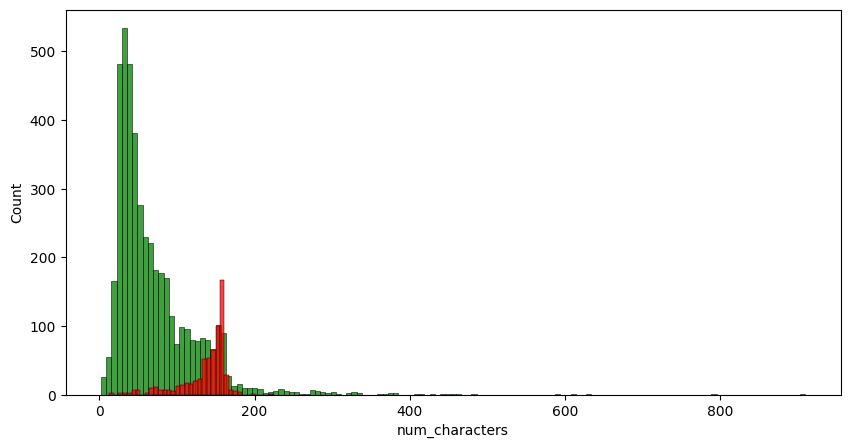

In [24]:
plt.figure(figsize=(
10,5))
sns.histplot(df[df.label=='ham']["num_characters"],color="green")
sns.histplot(df[df.label=='spam']["num_characters"],color="red")

In [25]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [26]:
from wordcloud import WordCloud

In [27]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [28]:
import wordcloud
from wordcloud import WordCloud


In [29]:
ham_message=df[df.label=='ham'].message
spam_message=df[df.label=='spam'].message

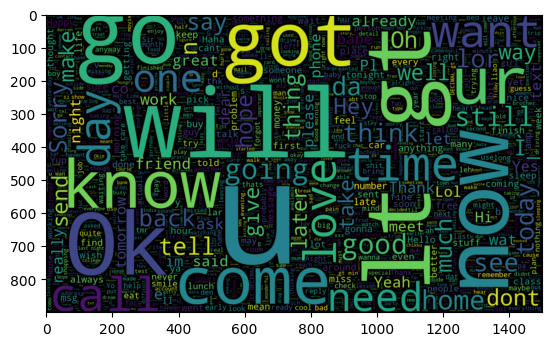

In [30]:
wc=WordCloud(width=1500,height=900,max_words=2500).generate(" ".join(ham_message))
plt.imshow(wc,interpolation="bilinear")


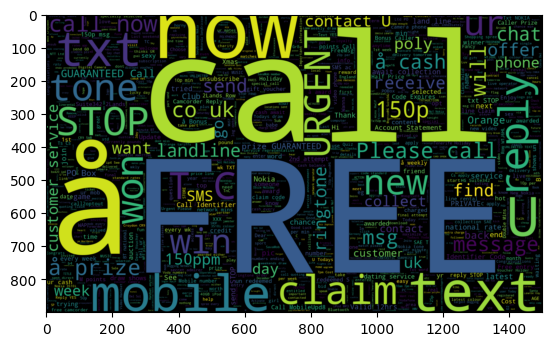

In [31]:
wc=WordCloud(width=1500,height=900,max_words=2500).generate(" ".join(spam_message))
plt.imshow(wc,interpolation="bilinear")

# Data Preprocessing

In [32]:
df["message"][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

## Remove Punctuation

In [33]:
def remove_punc(text):
    trans=str.maketrans("","", string.punctuation)
    return text.translate(trans)

In [34]:
df.message=df.message.apply(remove_punc)

C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_18380\250455734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.message=df.message.apply(remove_punc)


In [35]:
df.message

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                  Will Ì b going to esplanade fr home
5569    Pity  was in mood for that Soany other suggest...
5570    The guy did some bitching but I acted like id ...
5571                            Rofl Its true to its name
Name: message, Length: 5169, dtype: object

In [36]:
def remove_noise(text):
    return re.sub("[^a-zA-Z]"," ",text)

In [37]:
df.message=df.message.apply(remove_noise)

C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_18380\1965935323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.message=df.message.apply(remove_noise)


In [38]:

df.message

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in   a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5567    This is the  nd time we have tried   contact u...
5568                  Will   b going to esplanade fr home
5569    Pity  was in mood for that Soany other suggest...
5570    The guy did some bitching but I acted like id ...
5571                            Rofl Its true to its name
Name: message, Length: 5169, dtype: object


# Remove Stopwords

In [39]:
nltk.download("stopwords")
from nltk.corpus import stopwords
sw=stopwords.words("english")

[nltk_data] Downloading package stopwords to C:\Users\NEERA
[nltk_data]     KUMARI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
len(sw)

179

In [41]:
def remove_sws(text):
    t=[word for word in text.split() if word not in sw]
    return " ".join(t)

In [42]:
df.message=df.message.apply(remove_sws)

C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_18380\282326385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.message=df.message.apply(remove_sws)


In [43]:
df.message[0]

'Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat'

In [44]:
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to C:\Users\NEERA
[nltk_data]     KUMARI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\NEERA
[nltk_data]     KUMARI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\NEERA
[nltk_data]     KUMARI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Lemmatize The Text

In [45]:
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()
def lemma(text):
    t=[lem.lemmatize(word) for word in text.split()]
    return " ".join(t)

In [46]:
df.message=df.message.apply(lemma)

C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_18380\2879135656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.message=df.message.apply(lemma)


In [47]:
df.head()

,label,message,num_characters,num_words,num_sentences
0,ham,Go jurong point crazy Available bugis n great ...,111,24,2
1,ham,Ok lar Joking wif u oni,29,8,2
2,spam,Free entry wkly comp win FA Cup final tkts st ...,155,37,2
3,ham,U dun say early hor U c already say,49,13,1
4,ham,Nah I dont think go usf life around though,61,15,1


# Label Encoder

In [48]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df.label=encoder.fit_transform(df.label)

C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_18380\4025779966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label=encoder.fit_transform(df.label)


In [49]:
df.head()

,label,message,num_characters,num_words,num_sentences
0,0,Go jurong point crazy Available bugis n great ...,111,24,2
1,0,Ok lar Joking wif u oni,29,8,2
2,1,Free entry wkly comp win FA Cup final tkts st ...,155,37,2
3,0,U dun say early hor U c already say,49,13,1
4,0,Nah I dont think go usf life around though,61,15,1


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=300)
x=tf.fit_transform(df["message"]).toarray()
y=df.label

In [51]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(x,y,random_state=42)

In [52]:
xtr.shape,xts.shape,ytr.shape,yts.shape

((3876, 300), (1293, 300), (3876,), (1293,))

In [53]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [54]:
clf=MultinomialNB()
clf.fit(xtr,ytr)
ypred=clf.predict(xts)
accuracy_score(yts,ypred)

0.9644238205723125

In [55]:
print(classification_report(yts,ypred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1107
           1       0.96      0.78      0.86       186

    accuracy                           0.96      1293
   macro avg       0.96      0.89      0.92      1293
weighted avg       0.96      0.96      0.96      1293



Text(0.5, 23.52222222222222, 'Predicted')

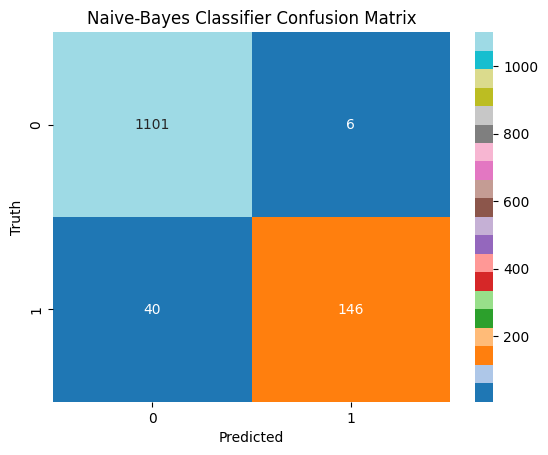

In [56]:
sns.heatmap(confusion_matrix(yts,ypred),annot=True,cmap="tab20",fmt="d")
plt.title("Naive-Bayes Classifier Confusion Matrix")

plt.ylabel("Truth")
plt.xlabel("Predicted")

In [57]:
import pickle
pickle.dump(tf,open("vectorizer.pkl","wb"))
pickle.dump(clf,open("model.pkl","wb"))

In [58]:
import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(lemma.lemmatize(i))
    return " ".join(y)
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))
st.title("Email/SMS Spam Classifier")
input_sms = st.text_area("Enter the message")
if st.button('Predict'):
    # 1. preprocess
    transformed_sms = transform_text(input_sms)
    # 2. vectorize
    vector_input = tfidf.transform([transformed_sms])
    # 3. predict
    result = model.predict(vector_input)[0]
    # 4. Display
    if result == 1:
        st.header("Spam")
    else:
        st.header("Not Spam")

2024-03-15 19:22:47.993 
  command:

    streamlit run C:\Users\NEERA KUMARI\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
